### <center>**Assignment**</center>

We try to make predition from another dataset [breast cancer wisconsin](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). But there are too many features in this dataset. Please try to improve accuracy per feature

$$\frac{\text{Accuracy}}{\text{\# Features}}$$

HINT:

- You can improve the ratio by picking out several important features.
- The ratio can be improved from 0.03 up to 0.44.

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# load the breast_cancer dataset
init_data = load_breast_cancer()
(X, y) = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(data=X, columns=init_data['feature_names'])
y = pd.DataFrame(data=y, columns=['label'])

# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train a RandomForestClassifier as model 
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train.values.ravel())

y_pred = forest.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy per feature: %.2f' % (accuracy_score(y_test, y_pred)/X.shape[1]))

Accuracy: 0.98
Accuracy per feature: 0.03


 1) worst concave points           0.141849
 2) mean concave points            0.117697
 3) worst radius                   0.110919
 4) worst perimeter                0.105243
 5) mean concavity                 0.077163
 6) worst area                     0.073364
 7) area error                     0.041760
 8) mean perimeter                 0.036943
 9) mean radius                    0.035625
10) worst concavity                0.035205
11) mean area                      0.032890
12) worst texture                  0.022736
13) mean texture                   0.018584
14) worst compactness              0.016786
15) radius error                   0.015408
16) worst symmetry                 0.014770
17) worst smoothness               0.014235
18) mean compactness               0.010085
19) perimeter error                0.010040
20) worst fractal dimension        0.009015
21) concave points error           0.008085
22) compactness error              0.007420
23) mean smoothness             

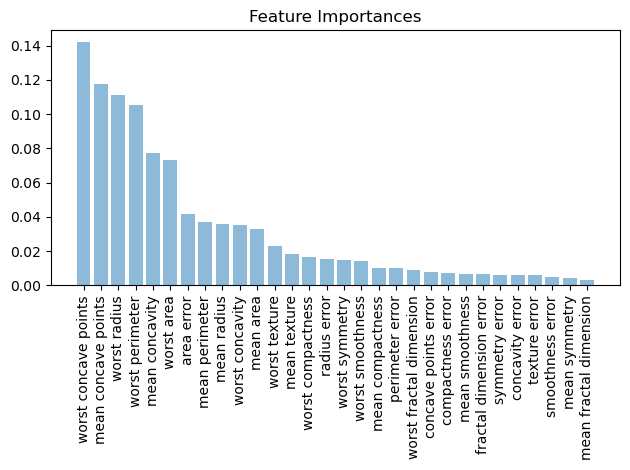

In [43]:
import numpy as np
import matplotlib.pyplot as plt
importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X.columns.values[indices[f]], 
                            importances[indices[f]]))

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]), 
           X.columns.values[indices], rotation=90)
plt.tight_layout()
plt.savefig('./output/fig-forest-feature-importances.png', dpi=300)
plt.show()

In [44]:
# select important feature
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.111, prefit=True)
Z_forest = sfm.transform(X.values)

for f in range(Z_forest.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X.columns.values[indices[f]], 
                            importances[indices[f]]))

 1) worst concave points           0.141849
 2) mean concave points            0.117697


In [45]:
# train a random forest based on Z_forest_alt
Z_forest_train, Z_forest_test, y_forest_train, y_forest_test = train_test_split(
    Z_forest, y, test_size=0.3, random_state=0)

forest_z = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)
forest_z.fit(Z_forest_train, y_forest_train.values.ravel())

y_forest_pred = forest_z.predict(Z_forest_test)
print('Accuracy (forest_z): %.2f' % accuracy_score(y_forest_test, y_forest_pred))
print('Accuracy per feature (forest_z): %.2f' % (accuracy_score(y_forest_test, y_forest_pred)/Z_forest.shape[1]))

Accuracy (forest_z): 0.89
Accuracy per feature (forest_z): 0.44


### **Requirements:**

- Submit to **eeclass** with your code named `Lab03_{student-id}`.ipynb (e.g. `Lab03_110069999.ipynb`).
- **The code file should only contain the Assignment part.**
- Remember to save the file after you rendered the output images in your notebook.
- Deadline: **2024-01-07 (Sun) 23:59.**